In [2]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 2.8 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [5]:
#read a dataset
data = pd.read_csv("mushrooms.csv")


In [6]:
# data visulation
data.head()



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# find the edible and poisonous
class_counts = data['class'].value_counts()
print(class_counts)


e    4208
p    3916
Name: class, dtype: int64


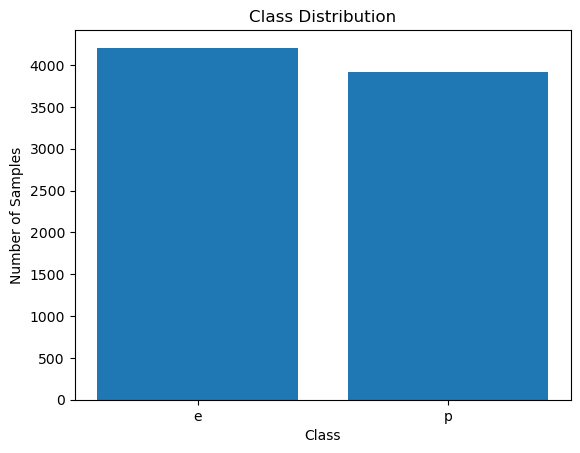

In [29]:
import matplotlib.pyplot as plt

# Find class counts
class_counts = data['class'].value_counts()

# Create a bar graph
plt.bar(class_counts.index, class_counts.values)

# Set the graph title and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Show the graph
plt.show()



In [13]:
# Select attributes and tags
X = data.loc[:, ["cap-shape", "cap-color", "ring-number", "ring-type"]]
y = data["class"]


In [14]:
from sklearn.preprocessing import LabelEncoder

# Özellik sütunlarını işleme
for column in X.columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])

# Etiket sütununu işleme
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [28]:
# Print the transformed X data
print("Transformed X Data:")
print(X.head())

# Print the transformed y data
print("\nTransformed y Data:")
print(y)


Transformed X Data:
   cap-shape  cap-color  ring-number  ring-type
0          5          4            1          4
1          5          9            1          4
2          0          8            1          4
3          5          8            1          4
4          5          3            1          0

Transformed y Data:
[1 0 0 ... 0 1 0]


In [16]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test veri setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Eğitim özellikleri
# X_test: Test özellikleri
# y_train: Eğitim etiketleri
# y_test: Test etiketleri


In [18]:
mlp_model = MLPClassifier(max_iter=1000)  # For example, increase max_iter.


In [19]:
# Create and train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Create and train a Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Create and train a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Create and train an MLP (Multilayer Perceptron) model
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

# Create and train a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


/Users/bartutanacan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier()

In [23]:
from sklearn.linear_model import RidgeClassifier

# Create the Ridge Classifier model
ridge_classifier_model = RidgeClassifier()

# Ridge Classifier modelini eğitin
ridge_classifier_model.fit(X_train, y_train)


RidgeClassifier()

In [24]:
# Train the Logistic Classifier model

logistic_regression_model.fit(X_train, y_train)

# Train the Ridge Classifier model

ridge_classifier_model.fit(X_train, y_train)

# Train the Decision Tree model

decision_tree_model.fit(X_train, y_train)

# Train the Naive Bayes model

naive_bayes_model.fit(X_train, y_train)

# Train the Neural Network model

mlp_model.fit(X_train, y_train)


/Users/bartutanacan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [26]:
from sklearn.metrics import classification_report

# Logistic Regression model prediction and classification report
logistic_regression_predictions = logistic_regression_model.predict(X_test)
logistic_regression_report = classification_report(y_test, logistic_regression_predictions)

# Decision Tree model prediction and classification report
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_report = classification_report(y_test, decision_tree_predictions)

# Gaussian Naive Bayes model prediction and classification report
naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_report = classification_report(y_test, naive_bayes_predictions)

# MLP (Multi-Layer Perceptron) model prediction and classification report
mlp_predictions = mlp_model.predict(X_test)
mlp_report = classification_report(y_test, mlp_predictions)

# Random Forest model prediction and classification report
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_report = classification_report(y_test, random_forest_predictions)

# Print the reports
print("Logistic Regression Model Classification Report:\n", logistic_regression_report)
print("Decision Tree Model Classification Report:\n", decision_tree_report)
print("Gaussian Naive Bayes Model Classification Report:\n", naive_bayes_report)
print("MLP Model Classification Report:\n", mlp_report)
print("Random Forest Model Classification Report:\n", random_forest_report)


Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       843
           1       0.78      0.78      0.78       782

    accuracy                           0.79      1625
   macro avg       0.79      0.79      0.79      1625
weighted avg       0.79      0.79      0.79      1625

Decision Tree Model Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       843
           1       0.87      0.91      0.89       782

    accuracy                           0.89      1625
   macro avg       0.89      0.89      0.89      1625
weighted avg       0.89      0.89      0.89      1625

Gaussian Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       843
           1       0.78      0.79      0.79       782

    accuracy                         

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
random_forest_model = RandomForestClassifier()

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
random_forest_predictions = random_forest_model.predict(X_test)

# Print the classification report for Random Forest
from sklearn.metrics import classification_report

random_forest_report = classification_report(y_test, random_forest_predictions)

# Print the Random Forest model's classification report
print("Random Forest Model Classification Report:\n", random_forest_report)


Random Forest Model Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       843
           1       0.87      0.91      0.89       782

    accuracy                           0.89      1625
   macro avg       0.89      0.89      0.89      1625
weighted avg       0.89      0.89      0.89      1625

